## Sales forecasting using Machine learning

<h5> Here, we use the dataset of Walmart sales to forecast future sales using machine learning in Python. Linear regression use to forecast sales. Numpy, Pandas, Sklearn, Scipy, Seaborn Python libraries used in this program. We implement in three steps first to import libraries second by using that libraries prepare data and third forecast.

### Step-1: Importing stanndard Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import seaborn as sns

### Step-2: Here we perfrom four Tasks:
<h4> 1. Get data from .csv file.
<h4> 2. Merging the Data.
<h4> 3. Analyze the Data.
<h4> 4. Manipulating the Data.

### 1.Getting data from .csv file.

In [2]:
features = pd.read_csv('/home/chetan/Desktop/walmart-recruiting-store-sales-forecasting/features.csv.zip')
test = pd.read_csv('/home/chetan/Desktop/walmart-recruiting-store-sales-forecasting/test.csv.zip')
train = pd.read_csv('/home/chetan/Desktop/walmart-recruiting-store-sales-forecasting/train.csv.zip')
store = pd.read_csv('/home/chetan/Desktop/walmart-recruiting-store-sales-forecasting/stores.csv')

In [3]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


### 2.Take important information and merging data.
<h4> From train.csv taking groupby Store,Date and Sum of Weekly_sale

In [4]:
train = train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train = train.reset_index()
train.head(10)

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
5,1,2010-03-12,1439541.59
6,1,2010-03-19,1472515.79
7,1,2010-03-26,1404429.92
8,1,2010-04-02,1594968.28
9,1,2010-04-09,1545418.53


In [5]:
features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


<h4> Merging train and features data by inner join.

In [6]:

data = pd.merge(train,features,on=['Store','Date'],how='inner')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,1439541.59,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,1472515.79,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,1404429.92,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,1594968.28,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,1545418.53,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [7]:
# Merging data and store on store by inner join
data = pd.merge(data,store,on=['Store'],how='inner')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,2010-03-12,1439541.59,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,2010-03-19,1472515.79,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,2010-03-26,1404429.92,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,2010-04-02,1594968.28,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,2010-04-09,1545418.53,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


In [8]:
# Sorting valuse of data by Date
data = data.sort_values(by='Date')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,NaN,NaN,NaN,NaN,NaN,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,C,42988
3432,25,2010-02-05,677231.63,21.10,2.784,NaN,NaN,NaN,NaN,NaN,204.247194,8.187,False,B,128107
3003,22,2010-02-05,1033017.37,24.36,2.788,NaN,NaN,NaN,NaN,NaN,135.352461,8.283,False,B,119557
3146,23,2010-02-05,1364721.58,15.25,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,5.892,False,B,114533
3289,24,2010-02-05,1388725.63,22.43,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.326,False,A,203819
2574,19,2010-02-05,1507637.17,20.96,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.350,False,A,203819


### 3. Analyzing the Data
<h4> Here we see different methods to analyze data.
<h4> Count plot of Type    

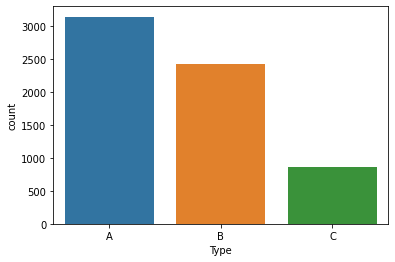

In [9]:
sns.countplot(x='Type',data=data)
sns.set(rc={'figure.figsize':(7.7,7.27)})

### Box Plot of Type and weekly_Sales

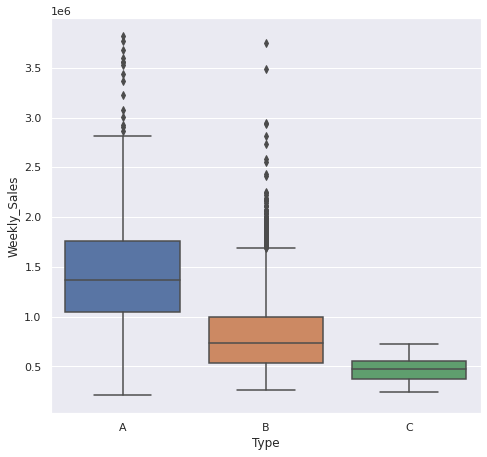

In [10]:
sns.boxplot(x='Type',y='Weekly_Sales',data=data)
sns.set(rc={'figure.figsize':(7.7,8.27)})

### Histogram of Weekly_Sales

<AxesSubplot:ylabel='Frequency'>

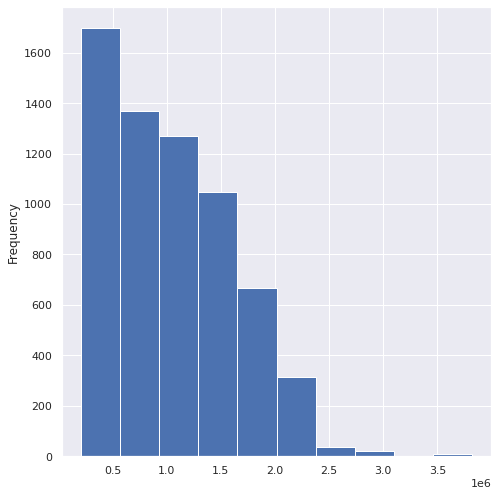

In [11]:
data['Weekly_Sales'].plot.hist()

#### Count Plot of IsHoliday

<AxesSubplot:xlabel='IsHoliday', ylabel='count'>

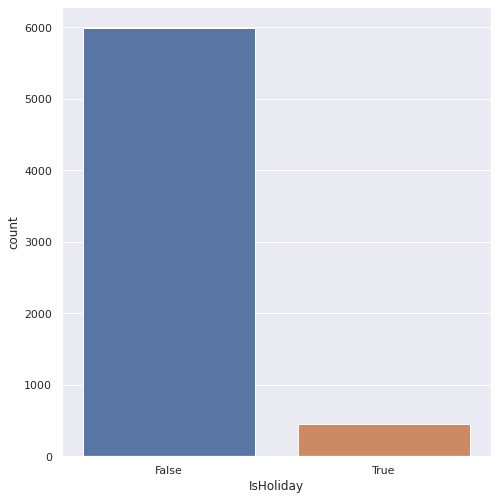

In [12]:
sns.countplot(x='IsHoliday',data=data)

<h4> Now,we check the null values of data

In [13]:
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Type               0
Size               0
dtype: int64

<h4> Heatmap is another way to represent the null values

<AxesSubplot:>

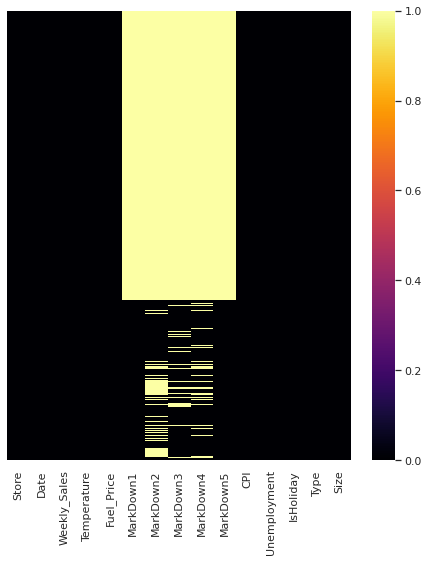

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='inferno')

#### 4. Manipulating data. Transform data into useful information and deleting unnecessary items. Getting the final data.

<h4>Removing the unnecessary columns.

In [15]:
data = data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988
3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107
3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557
3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533
3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819
2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819


#### Heatmap For verifying there are no null Values in data

<AxesSubplot:>

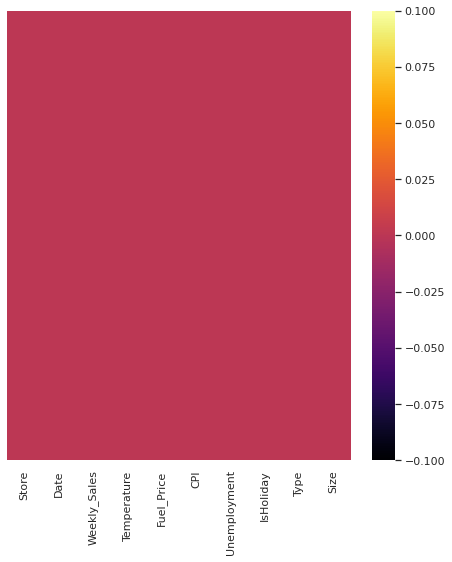

In [16]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='inferno')

####  Converting IsHoliday in Holiday which is integer and 1 for holiday and 0 otherwise.



In [17]:
data['Holiday'] = [int(i) for i in list(data.IsHoliday)]
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0
3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107,0
3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557,0
3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533,0
3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819,0
2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819,0


#### Converting type to an integer by one-hot encoding. The first column is also removed because we know of both columns B and C are 0 then it is A-type. So B=1 and C=0 for B.B=0 and C=1 for C.B=0 and C=0 for A.

In [18]:
Type_dummy = pd.get_dummies(data['Type'],drop_first=True)
Type_dummy.head(10)

,B,C
0,0,0
1287,1,0
5148,0,1
2288,1,0
4147,0,1
3432,1,0
3003,1,0
3146,1,0
3289,0,0
2574,0,0


#### Concating type_dummy with data.



In [19]:
data=pd.concat([data,Type_dummy],axis=1)
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0,0,1
3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107,0,1,0
3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557,0,1,0
3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533,0,1,0
3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819,0,0,0
2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819,0,0,0


#### We only use integer so we removing non-integer columns after transforming it into integer form.

In [20]:
data = data.drop(['Type','IsHoliday'],axis=1)
data.drop(50)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,42988,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,56.69,3.882,216.151590,7.293,128107,0,1,0
714,5,2012-10-26,319550.77,71.70,3.506,224.037814,5.422,34875,0,1,0
5719,40,2012-10-26,921264.52,49.65,3.917,138.728161,4.145,155083,0,0,0
2573,18,2012-10-26,1127516.25,56.09,3.917,138.728161,8.243,120653,0,1,0


### Step-3 Now, we perform learning tasks on this data in four steps.

<h4> 1.Splitting the train and test data.
<h4> 2.Applying linear regression.
<h4> 3.Predicting the value
<h4> 4.Evaluate the model

### 1. Splitting data into train and test data. The size of the test data is 30%.

In [21]:
X = data.drop(['Weekly_Sales','Store','Date'],axis=1)
y = data['Weekly_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### 2. Applying linear regression and fit the training data into it.

In [22]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### 3. Predicting the data for test value as per linear regression.

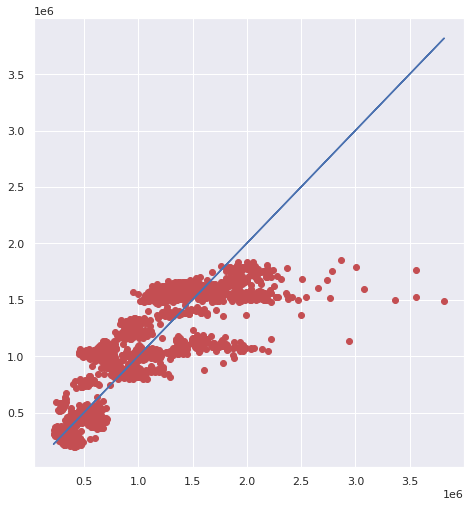

In [23]:
y_pred = LR.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()


### 4. Evaluating the model by calculating errors by the root mean square error and R -squared.

In [24]:
Root_mean_square_error = np.sqrt(np.mean(np.square(y_test-y_pred)))
print(Root_mean_square_error)

315671.75620036747


In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.6872012243013732


### Now, if we want to predict the weekly sales. Then we give particular tuple to input in the model and predict the weekly sales as output. Here I’m showing an example of that.

In [27]:
prediction=LR.predict(pd.DataFrame([(39.05,2.572,210.752605,8.324,42988,0,0,1)]))
print(prediction)

[433689.96625511]
